# Homework1

Please upload to Moodle your archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. Please also prepare a requirements.txt file which lists all the packages that you use for your homework, one package per line (e.g., pandas). This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".
Please name your archive using your full name and student id. For your Notebook please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write.
Your code and analysis is like a story that awaits to be read, make it a nice story please!

**Deadline: Sunday, 26 February, 2017, midnight.** 

## Exercises

This homework focuses on data exploration and preparation for a particular problem and dataset.
The problem and data come from the Amazon online shopping platform. Several sellers can sell the same product on Amazon. Based on the data provided by the seller to Amazon (seller reputation, product price, shipping details, etc) Amazon ranks seller offers from best to worst for a given product. This ranking is mostly influenced by the product price offer of the seller, but it can also be influenced by other features. The goal is to explore and transform the data to try and understand which features are most indicative of a seller being ranked first by Amazon for a product. When the seller is ranked first for a product we say that the seller is the 'winner' among all the offers, because their offer is shown first when a user searches for a product on Amazon, which increases their chances of selling the product.

We have a CSV file describing offers by given sellers for given products and a column which records whether an offer was a winner or not.

(1). [50] Prepare a data quality report for the CSV file. 
    - [2.5] Check how many rows and columns your CSV has.
    - [2.5] Show the first and the last 5 rows.
    - [10] Prepare a table with descriptive statistics for all the continuous features.
    - [10] Prepare a table with descriptive statistics for all the categorical features.
    - [5] Drop duplicate rows and columns, if any.
    - [5] Drop constant columns, if any.
    
    For the updated CSV and data frame (after column/row removal):
    - [2.5] Prepare a table with descriptive statistics for all the continuous features.
    - [2.5] Prepare a table with descriptive statistics for all the categorical features.
    - [2.5] Plot histograms for all the continuous features.
    - [2.5] Plot box plots for all the continuous features.
    - [2.5] Plot bar plots for all the categorical features.
    - [2.5] Save all the tables, plots and initial discussion of your findings, into a single data quality report file.   

(2). [30] Prepare a data quality plan for the CSV file.
    - [10] Mark down all the features where there are potential problems or data quality issues.
    - [10] Propose solutions to deal with the problems identified. Explain why did you choose one solution over (potentially many) other.
    - [10] Apply your solutions to obtain a new CSV file where the data quality issues identified were addressed. Save the new CSV file with a self_explanatory name. Save the data quality plan to a single file (as a table or structured text).
        
(3). [20] Exploring relationships between feature pairs:
    - [10] Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.
    - [10] Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (IsWinner)? Explain in plain words (a short paragraph) the story of your findings so far.


# 1. Prepare the data frame and data quality report 

In [32]:
#Import the required packages

#Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib  for visualisation/plotting
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

#import package matplotlib for import plots to PDF
from matplotlib.backends.backend_pdf import PdfPages

#import package seaborn for visualisation
import seaborn as sns

# Reading from a csv file, into a data frame
df = pd.read_csv('amazon-offers-10k-samples-raw.csv')


## 1.1 Check how many rows and columns the data frame has 

In [33]:
# Check how many rows and columns the data frame has 
df.shape

(10000, 21)

## 1.2 Show the first and the last 5 rows

In [34]:
#Show the first 5 rows.
df.head(5)

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
0,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,CAD,0,...,1207135739277432339,0.00,CAD,672,1008,NOW,1,NaN,NaN,new
1,1,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,CAD,95,...,-1789487307643024748,0.00,CAD,48,72,NOW,1,CA,ON,new
2,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,.,1,0,100.46,CAD,98,...,5452082314297826053,6.99,CAD,24,48,NOW,1,CA,ON,new
3,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,CAD,95,...,-2572277640783537773,11.67,CAD,24,48,NOW,1,CA,ON,new
4,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,CAD,94,...,-8704029307873847986,8.99,CAD,24,48,NOW,1,CA,ON,new


In [35]:
#Show the last 5 rows
df.tail(5)

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
9995,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,"Dispatched from England by Priority Airmail, a...",1,0,92.72,CAD,91,...,-1888136325356517677,7.50,CAD,72,96,NOW,1,NaN,NaN,new
9996,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,96.77,CAD,88,...,-6639690782514669126,11.84,CAD,96,120,NOW,1,NaN,NaN,new
9997,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,110.68,CAD,96,...,9012427554787096099,6.00,CAD,24,48,NOW,1,NaN,NaN,new
9998,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,105.73,CAD,0,...,3846853762521352076,15.26,CAD,24,48,NOW,1,NaN,NaN,new
9999,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,Duty free - Ships from USA,1,0,134.25,CAD,98,...,1163115142515862290,0.00,CAD,24,48,NOW,1,US,CA,new


## 1.3 Prepare a table with descriptive statistics for all the continuous features.


In [36]:
#Find all the continuous features 

continuous_columns=df[['ListingPrice','SellerFeedbackRating','SellerFeedbackCount','ShippingPrice',
                       'ShippingTime_minHours','ShippingTime_maxHours']].columns

#df[continuous_columns].dtypes
# Descriptive stats for continuous features
df[continuous_columns].describe().T



,count,mean,std,min,25%,50%,75%,max
ListingPrice,10000.0,215.881699,255.581702,3.24,63.33,126.02,257.8925,3194.32
SellerFeedbackRating,10000.0,89.039700,21.470301,0.00,91.00,95.00,96.0000,100.00
SellerFeedbackCount,10000.0,6915.794700,10970.179276,0.00,338.00,3293.00,8452.0000,41420.00
ShippingPrice,10000.0,12.396776,26.361234,0.00,0.00,7.50,13.6400,705.27
ShippingTime_minHours,10000.0,57.136800,82.450908,0.00,24.00,24.00,96.0000,672.00
ShippingTime_maxHours,10000.0,88.663200,119.827413,0.00,48.00,48.00,120.0000,1008.00


## 1.4 Prepare a table with descriptive statistics for all the categorical features

In [37]:
# Select columns containing categorical data
categorical_columns = df[['IsWinner','MarketplaceId','IsFeaturedMerchant',
                         'IsFulfilledByAmazon','ListingCurrency','ShippingCurrency','ShippingTime_availtype','ShipsDomestically',
                          'ShipsFromCountry','ShipsFromState','SubCondition']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
    
    
    
# Descriptive stats for categorical features
#df.select_dtypes(['category']).describe().T
df[categorical_columns].describe().T


,count,unique,top,freq
IsWinner,10000,2,0,9451
MarketplaceId,10000,1,1156461832353164887,10000
IsFeaturedMerchant,10000,2,1,8166
IsFulfilledByAmazon,10000,2,0,9632
ListingCurrency,10000,1,CAD,10000
ShippingCurrency,10000,1,CAD,10000
ShippingTime_availtype,10000,1,NOW,10000
ShipsDomestically,10000,1,1,10000
ShipsFromCountry,6273,13,CA,3668
ShipsFromState,5880,24,ON,2220


In [38]:
df.dtypes

IsWinner                  category
MarketplaceId             category
ProductId                    int64
TimeOfOfferChange           object
ConditionNotes              object
IsFeaturedMerchant        category
IsFulfilledByAmazon       category
ListingPrice               float64
ListingCurrency           category
SellerFeedbackRating         int64
SellerFeedbackCount          int64
SellerId                     int64
ShippingPrice              float64
ShippingCurrency          category
ShippingTime_minHours        int64
ShippingTime_maxHours        int64
ShippingTime_availtype    category
ShipsDomestically         category
ShipsFromCountry          category
ShipsFromState            category
SubCondition              category
dtype: object

## 1.5 Drop duplicate rows and columns

In [39]:
#Drop duplicate rows 
df=df.drop_duplicates()

#Drop duplicate columns  This one has a problem, it will change all data type to object 
#http://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns

df_tem=df.T.drop_duplicates().T
df_tem.head(5)


,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
0,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94,CAD,0,0,1207135739277432339,0,672,1008,NOW,1,NaN,NaN,new
1,1,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,CAD,95,4078,-1789487307643024748,0,48,72,NOW,1,CA,ON,new
2,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,.,1,0,100.46,CAD,98,478,5452082314297826053,6.99,24,48,NOW,1,CA,ON,new
3,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,CAD,95,4384,-2572277640783537773,11.67,24,48,NOW,1,CA,ON,new
4,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,CAD,94,105,-8704029307873847986,8.99,24,48,NOW,1,CA,ON,new


Hope the pasta goes well. 

In [40]:
#After check the df_tem.head(5) and df.head(5) table, we found the missed column is ShippingCurrency
#So the duplicated column in the table is ShippingCurrency
df=df.drop('ShippingCurrency',1)
#df.shape

## 1.6 Drop constant columns

In [41]:
#from the table of categorical features
#Drop constant columns which unique is 1. Those are constant columns
df.drop(['MarketplaceId','ListingCurrency','ShippingTime_availtype','ShipsDomestically','SubCondition'], 
        axis=1, inplace=True)



## 1.7 Descriptive stats for continuous features of the updated data frame

In [42]:
# Descriptive stats for continuous features of the updated data frame 
df[continuous_columns].describe().T.to_csv('continuous_descriptive_stats.csv')
df[continuous_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
ListingPrice,9886.0,216.480167,256.579400,3.24,63.63,125.99,257.8625,3194.32
SellerFeedbackRating,9886.0,88.975926,21.559616,0.00,91.00,95.00,96.0000,100.00
SellerFeedbackCount,9886.0,6910.402488,10918.235681,0.00,338.00,3293.00,8452.0000,41420.00
ShippingPrice,9886.0,12.434700,26.476572,0.00,0.00,7.50,13.6800,705.27
ShippingTime_minHours,9886.0,57.266437,82.801069,0.00,24.00,24.00,96.0000,672.00
ShippingTime_maxHours,9886.0,88.874772,120.397193,0.00,48.00,48.00,120.0000,1008.00


## 1.8 Descriptive stats for categorical features of the updated data frame 

In [43]:
# Descriptive stats for categorical features of the updated data frame 

categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].describe().T.to_csv('categorical_descriptive_stats.csv')
df[categorical_columns].describe().T

,count,unique,top,freq
IsWinner,9886,2,0,9339
IsFeaturedMerchant,9886,2,1,8090
IsFulfilledByAmazon,9886,2,0,9519
ShipsFromCountry,6217,13,CA,3655
ShipsFromState,5851,24,ON,2211


## 1.9 Plot histograms for all the continuous features.

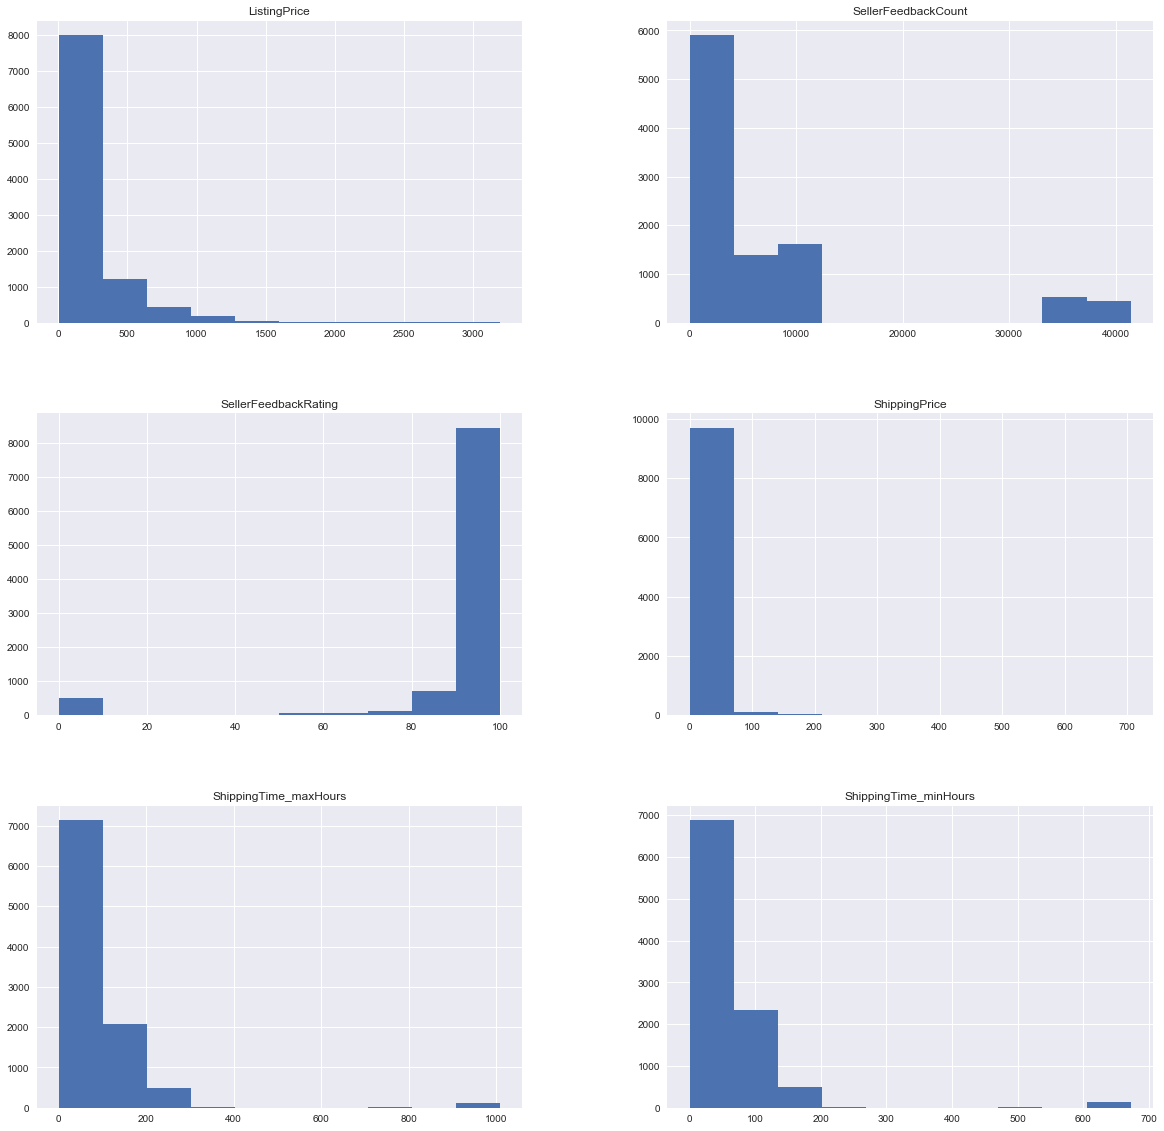

In [13]:
#To list many plot together 
%matplotlib inline
#Plot a histogram of the continuous feature Income
#df['ListingPrice'].hist();
#plt.show()
# Plot a boxplot for continuous feature Income

#plt.figure(figsize=(20,10))

#df['SellerFeedbackCount'].plot(kind='box')
#plt.show()


#Plot histograms for all the continuous features.
plt.figure()
df[continuous_columns].hist(figsize=(20, 20))
plt.savefig('continuous_histograms.png')


## 1.10 Plot box plots for all the continuous features.

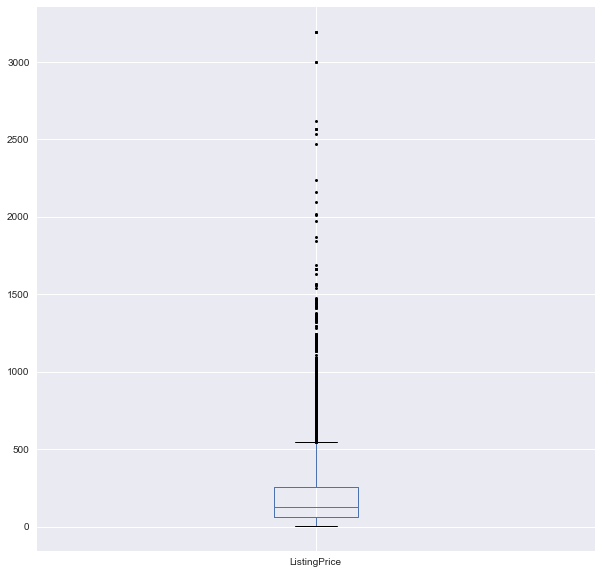

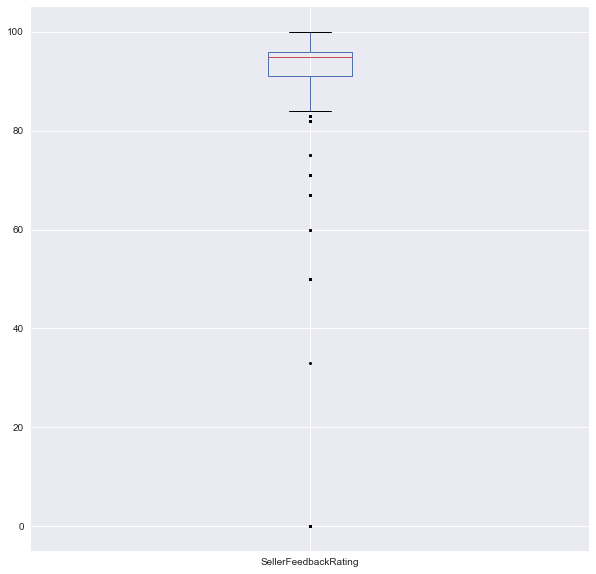

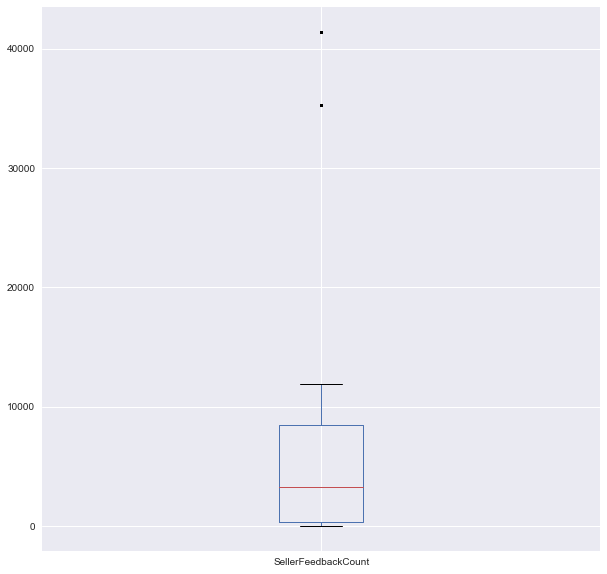

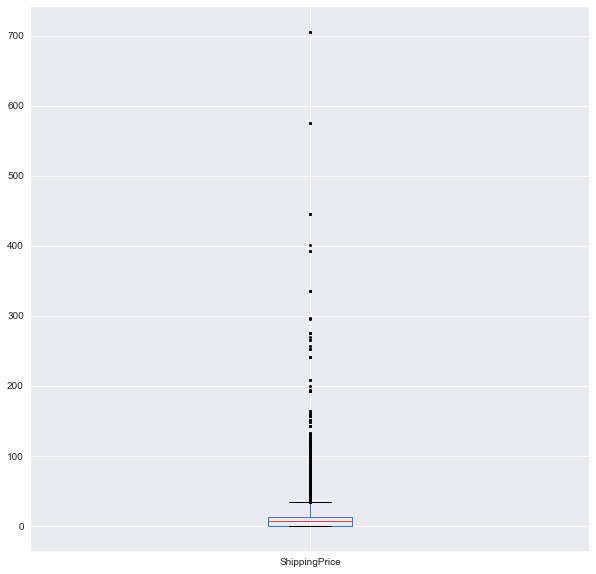

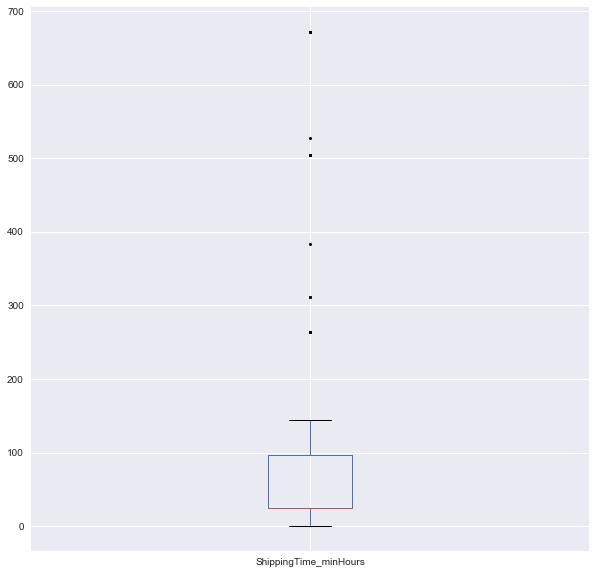

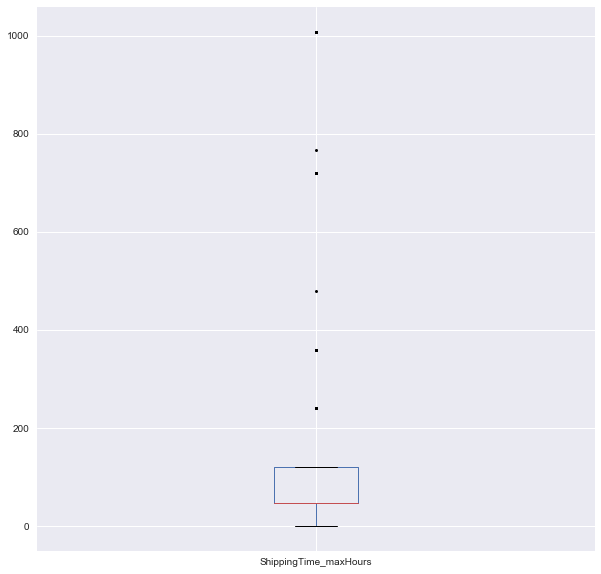

In [14]:

#Plot box plot for all the continuous features.
#plt.figure(figsize=(60, 60))
#df[continuous_columns].plot(kind='box')

#Plot histograms for all the continuous features.
pp = PdfPages('continuous_box_plots.pdf')

for col in continuous_columns:
    f = df[col].plot(kind='box',figsize=(10,10),sym='k.')
    pp.savefig(f.get_figure())
    plt.show()  

pp.close()


## 1.11 Plot bar plots for all the categorical features

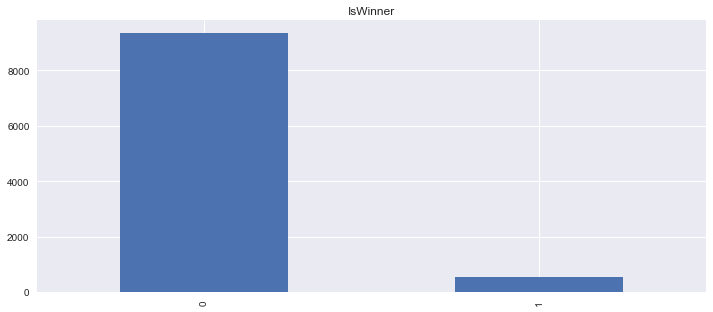

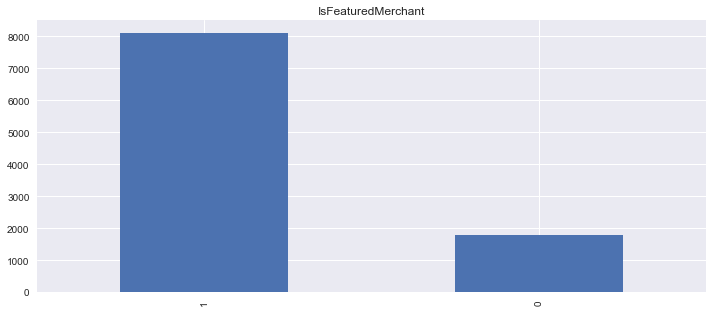

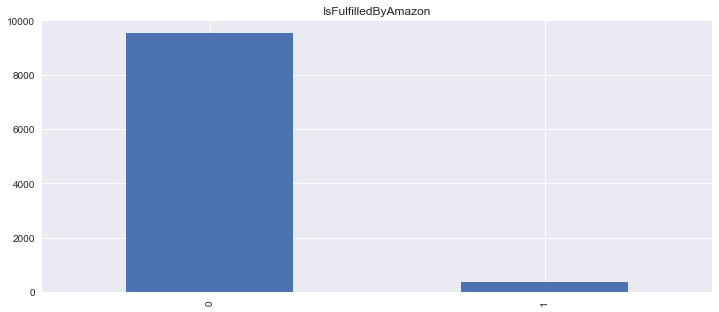

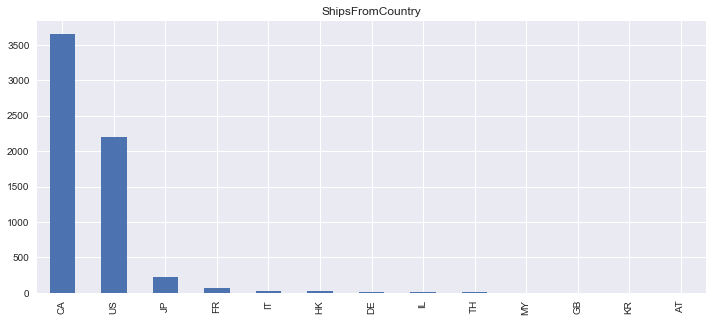

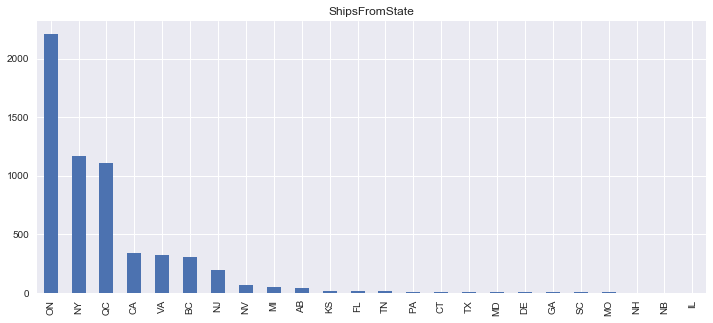

In [15]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('categorical_bar_charts.pdf')

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()



# 2. Data Understanding: data quality plan

## 2.1 Irregular cardinality

Categorical features can have irregular cardinality if the same value is entered several times with a different spelling for example. In the following cell, I check whether there are any values in the categorical features which are duplicated because 
of spelling mistakes or different input standards

In [16]:
# Check for irregular cardinality in categorical features. There could be same values spelled differently
print("Unique values for:IsWinner:", pd.unique(df.IsWinner.ravel()))
print("\n- IsFeaturedMerchant:", pd.unique(df.IsFeaturedMerchant.ravel()))
print("\n- IsFulfilledByAmazon:", pd.unique(df.IsFulfilledByAmazon.ravel()))
print("\n- ShipsFromCountry:", pd.unique(df.ShipsFromCountry.ravel()))
print("\n- ShipsFromState:", pd.unique(df.ShipsFromState.ravel()))

Unique values for:IsWinner: [0 1]

- IsFeaturedMerchant: [1 0]

- IsFulfilledByAmazon: [1 0]

- ShipsFromCountry: [nan 'CA' 'US' 'HK' 'JP' 'IT' 'DE' 'FR' 'MY' 'GB' 'TH' 'IL' 'AT' 'KR']

- ShipsFromState: [nan 'ON' 'AB' 'NY' 'QC' 'NV' 'VA' 'NJ' 'CA' 'BC' 'MI' 'PA' 'TX' 'KS' 'FL'
 'NH' 'MD' 'TN' 'SC' 'MO' 'DE' 'NB' 'CT' 'GA' 'IL']


There are no values in the categorical features that is duplicated. The cardinality of those features is correct.



## 2.2 Null values

In the following cell, I check for null values in the dataset.

In [17]:
# Check whether there are null values in the data where values would be expected
df.isnull().sum()

IsWinner                    0
ProductId                   0
TimeOfOfferChange           0
ConditionNotes           4626
IsFeaturedMerchant          0
IsFulfilledByAmazon         0
ListingPrice                0
SellerFeedbackRating        0
SellerFeedbackCount         0
SellerId                    0
ShippingPrice               0
ShippingTime_minHours       0
ShippingTime_maxHours       0
ShipsFromCountry         3669
ShipsFromState           4035
dtype: int64

For the ConditionNotes column, as it has too more than 50% missing data, and the notes in the column is also not good for our data analytics, I decided to delete it. For ShipsFromCountry and ShipsFromState, there are more than 35% missing data, and for those data we don't have enough infomation to replace	missing	feature	values. Those two features could show where is the product from, while we could know the deliver information from ShippingPrice ShippingTime_minHours       ShippingTime_maxHours features. I decided to delete these two features, too. 


## 2.3 Outliers
In the box plots produced above, there are a number of outliers for all continuous features. They could be error in the data or represent correct information. For the SellerFeedbackCount feature, it is reasonable to have outliner. So we just keep it. Here I will list the top 10 to check if there is error in data. 

In [18]:
# In the box plot above, we can see that there are a number of outliers in the 'ListingPrice' feature.  
# Find out the top 10 with the highest price products
df.sort_values(by='ListingPrice', axis=0, ascending=False, inplace=False, 
               kind='quicksort', na_position='last').head(10)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
9069,0,2471683711038624825,2016-02-04T05:26:20.217Z,NaN,1,0,3194.32,96,1327,8648764257939339698,0.00,24,48,NaN,NaN
6890,0,2471683711038624825,2016-02-04T04:55:25.453Z,NaN,1,0,3194.32,96,1327,8648764257939339698,0.00,24,48,NaN,NaN
4947,0,2471683711038624825,2016-02-04T04:34:45.419Z,NaN,1,0,3194.32,96,1326,8648764257939339698,0.00,24,48,NaN,NaN
152,0,-5924928993300787167,2016-02-04T04:30:08.154Z,"GST/HST Only, No PST. Part Mummber: 184755",1,0,2999.00,95,4384,-2572277640783537773,12.12,24,48,CA,ON
4830,0,1711327863243739776,2016-02-04T04:34:33.189Z,"GST/HST Only, No PST. Part Number: ET91000SFP2",1,0,2999.00,95,4385,-2572277640783537773,12.52,24,48,CA,ON
4524,0,1653601677526888989,2016-02-04T04:35:03.079Z,NaN,0,0,2617.92,96,1790,1788801474825896666,9.98,96,120,US,NY
6889,0,2471683711038624825,2016-02-04T04:55:25.453Z,NaN,1,0,2567.17,95,5535,-8852182251270724705,0.00,24,48,NaN,NaN
9068,0,2471683711038624825,2016-02-04T05:26:20.217Z,NaN,1,0,2567.17,95,5535,-8852182251270724705,0.00,24,48,NaN,NaN
4946,0,2471683711038624825,2016-02-04T04:34:45.419Z,NaN,1,0,2567.17,95,5535,-8852182251270724705,0.00,24,48,NaN,NaN
3852,0,3685470799701177653,2016-02-04T04:33:34.697Z,NaN,0,0,2538.18,82,28,3369377968127476899,50.19,24,48,NaN,NaN


In [19]:
# In the box plot above, we can see that there are a number of outliers in the 'SellerFeedbackCount' feature. 
# This could be that some products have more feedback count than the other products 
# Find out the 10 products which have most feedback count
df.sort_values(by='SellerFeedbackCount', axis=0, ascending=False, 
               inplace=False, kind='quicksort', na_position='last').head(10)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
2466,0,-5545190337175589068,2016-02-04T04:32:19.017Z,NaN,1,0,39.91,96,41420,9012427554787096099,12.0,24,48,NaN,NaN
8981,0,3864781223791788768,2016-02-04T05:26:15.632Z,NaN,1,0,43.71,96,41420,9012427554787096099,6.0,24,48,NaN,NaN
9834,0,-353902426769369969,2016-02-04T05:41:07.145Z,NaN,1,0,137.21,96,41420,9012427554787096099,8.0,96,120,NaN,NaN
6147,0,-1203282458825787586,2016-02-04T04:55:59.174Z,"Ships from Canada. Not additional duties, no c...",1,0,92.42,96,41420,9012427554787096099,7.0,24,48,NaN,NaN
1984,0,-6519688935575603899,2016-02-04T04:31:54.801Z,"Ships from Canada. Not additional duties, no c...",1,0,183.16,96,41420,9012427554787096099,19.3,96,120,NaN,NaN
3043,0,-2193108631391234993,2016-02-04T04:33:12.191Z,NaN,1,0,202.82,96,41420,9012427554787096099,8.0,24,48,NaN,NaN
4574,0,6908842474652722158,2016-02-04T04:34:48.711Z,NaN,1,0,191.76,96,41420,9012427554787096099,20.7,24,48,NaN,NaN
793,0,-404889595042545079,2016-02-04T04:31:33.250Z,No additional duties or custom charges. Easy l...,1,0,206.53,96,41420,9012427554787096099,11.0,24,48,NaN,NaN
4560,0,-7853620206039503740,2016-02-04T04:34:05.923Z,NaN,1,0,83.90,96,41420,9012427554787096099,8.0,24,48,NaN,NaN
1970,0,-5814595164091155286,2016-02-04T04:32:22.176Z,NaN,1,0,75.30,96,41420,9012427554787096099,11.0,24,48,NaN,NaN


In [20]:
# In the box plot above, we can see that there are a number of outliers in the 'ShippingPrice' feature. This could be
# an error or it could be due to the fact that some products need higher delivery fee than the other products. 
# Find out the top 10 with the highest shipping price product 
df.sort_values(by='ShippingPrice', axis=0, ascending=False,
               inplace=False, kind='quicksort', na_position='last').head(10)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
1343,0,229338471365409007,2016-02-04T04:31:42.793Z,NaN,1,0,679.80,88,8452,-6639690782514669126,705.27,96,120,NaN,NaN
7392,0,229338471365409007,2016-02-04T04:56:20.610Z,NaN,1,0,679.80,88,8452,-6639690782514669126,705.27,96,120,NaN,NaN
5775,0,-281933683550746337,2016-02-04T04:38:39.530Z,NaN,1,0,503.49,88,8452,-6639690782514669126,575.09,96,120,NaN,NaN
610,0,-281933683550746337,2016-02-04T04:30:51.960Z,NaN,1,0,503.49,88,8452,-6639690782514669126,575.09,96,120,NaN,NaN
5067,0,5537362123079696830,2016-02-04T04:38:26.118Z,NaN,1,0,258.04,88,8452,-6639690782514669126,445.65,96,120,NaN,NaN
581,0,5537362123079696830,2016-02-04T04:31:04.968Z,NaN,1,0,258.04,88,8452,-6639690782514669126,445.65,96,120,NaN,NaN
5511,0,4725039555812453651,2016-02-04T04:38:26.233Z,NaN,1,0,319.33,88,8452,-6639690782514669126,400.76,96,120,NaN,NaN
2045,0,-4145374722991364977,2016-02-04T04:32:07.672Z,NaN,1,0,165.22,88,8452,-6639690782514669126,392.23,96,120,NaN,NaN
6345,0,-4145374722991364977,2016-02-04T04:56:25.794Z,NaN,1,0,165.22,88,8452,-6639690782514669126,392.23,96,120,NaN,NaN
924,0,-1024524342279296763,2016-02-04T04:31:40.790Z,NaN,1,0,929.02,93,2521,-5016003493506265192,335.35,24,48,US,VA


In [21]:
# In the box plot above, we can see that there are a number of outliers in the 'ShippingTime_minHours' feature. 
# Find out the top 10 
df.sort_values(by='ShippingTime_minHours', axis=0, ascending=False, 
               inplace=False, kind='quicksort', na_position='last').head(10)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
9524,0,7453706059544427211,2016-02-04T05:36:27.938Z,NaN,1,1,367.25,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
396,0,7049326277407521616,2016-02-04T04:30:31.163Z,NaN,1,1,32.99,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
7669,0,24775697167724061,2016-02-04T04:58:10.526Z,NaN,1,1,469.32,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
6455,0,7106195985037851238,2016-02-04T04:55:50.631Z,NaN,1,1,233.23,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
4964,0,-5150329556344912165,2016-02-04T04:34:52.016Z,NaN,1,1,69.99,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
8681,0,5056100547530134485,2016-02-04T05:13:10.021Z,NaN,1,1,220.00,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
1081,0,-3863656638443632646,2016-02-04T04:31:36.856Z,NaN,1,1,32.99,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
2162,0,4827935371379078023,2016-02-04T04:32:30.497Z,NaN,1,1,446.59,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
3300,0,5056100547530134485,2016-02-04T04:33:36.001Z,NaN,1,1,227.41,0,0,1207135739277432339,0.0,672,1008,NaN,NaN


In [22]:
# In the box plot above, we can see that there are a number of outliers in the 'ShippingTime_maxHours' feature. 
# Find out the top 10 
df.sort_values(by='ShippingTime_maxHours', axis=0, ascending=False, 
               inplace=False, kind='quicksort', na_position='last').head(10)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
9524,0,7453706059544427211,2016-02-04T05:36:27.938Z,NaN,1,1,367.25,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
396,0,7049326277407521616,2016-02-04T04:30:31.163Z,NaN,1,1,32.99,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
7669,0,24775697167724061,2016-02-04T04:58:10.526Z,NaN,1,1,469.32,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
6455,0,7106195985037851238,2016-02-04T04:55:50.631Z,NaN,1,1,233.23,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
4964,0,-5150329556344912165,2016-02-04T04:34:52.016Z,NaN,1,1,69.99,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
8681,0,5056100547530134485,2016-02-04T05:13:10.021Z,NaN,1,1,220.00,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
1081,0,-3863656638443632646,2016-02-04T04:31:36.856Z,NaN,1,1,32.99,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
2162,0,4827935371379078023,2016-02-04T04:32:30.497Z,NaN,1,1,446.59,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
3300,0,5056100547530134485,2016-02-04T04:33:36.001Z,NaN,1,1,227.41,0,0,1207135739277432339,0.0,672,1008,NaN,NaN


## 2.4 Duplicate rows
In the following cell, I check for duplicate rows. It is important to eliminate duplicates so as not to skew the result of the analysis, so if one candidate appears in more than one row, it would be necessary to eliminate one of the rows.

In [23]:
df_groupby=df.groupby(['ProductId','SellerId','TimeOfOfferChange'])
df_groupby.size()

ProductId             SellerId              TimeOfOfferChange       
-9172603785822419760  -8852182251270724705  2016-02-04T04:32:29.631Z    1
                                            2016-02-04T04:56:31.821Z    1
                      -6639690782514669126  2016-02-04T04:32:29.631Z    1
                                            2016-02-04T04:56:31.821Z    1
                      -5514312832713552000  2016-02-04T04:32:29.631Z    1
                                            2016-02-04T04:56:31.821Z    1
                      -5203594887869139290  2016-02-04T04:32:29.631Z    1
                                            2016-02-04T04:56:31.821Z    1
                      -5016003493506265192  2016-02-04T04:32:29.631Z    1
                                            2016-02-04T04:56:31.821Z    1
                      -2572277640783537773  2016-02-04T04:32:29.631Z    1
                                            2016-02-04T04:56:31.821Z    1
                      -1869213145998141353 

For those the same ProductId , SellerId and TimeOfOfferChange rows, 
they have different ListingPrice, so they are still not duplicated data 

## 2.5 Solutions

#### Data Quality Plan

| Feature                 | Data Quality Issue    | Handling Strategy            |
|-------------------------|-----------------------|------------------------------|
| ConditionNotes          | Missing Values (46.8%)| Drop	feature              |
| ShipsFromCountry        | Missing Values (37%)  | Drop	feature              | 
| ShipsFromState          | Missing Values (40.8%)| Drop	feature              |      
| ListingPrice            | Outliers              | Do nothing                   |
| SellerFeedbackRating    | Outliers              | Do nothing                   |
| SellerFeedbackCount     | Outliers              | Do nothing                   |
| ShippingPrice           | Outliers              | Do nothing                   |
| ShippingTime_minHours   | Outliers              | Do nothing                   |
| ShippingTime_minHours   | Outliers              | Do nothing                   |

I am removing all rows containing null values. For the ConditionNotes column, as it has too more than 50% missing data, and the notes in the column is also not good for our data analytics, I decided to delete it. For ShipsFromCountry and ShipsFromState, there are more than 35% missing data, and for those data we don't have enough infomation to replace	missing	feature	values. Those two features could show where is the product from, while we could know the deliver information from ShippingPrice ShippingTime_minHours       ShippingTime_maxHours features. I decided to delete these two features, too.

For outliers in all the continuous features, I decided not to remove them. Those features are normal for different products and sellers. 

In [27]:
df.drop(['ConditionNotes','ShipsFromCountry','ShipsFromState'], axis=1, inplace=True)

ValueError: labels ['ConditionNotes' 'ShipsFromCountry' 'ShipsFromState'] not contained in axis

In [28]:
df.to_csv('amazon_clean_data.csv')

In [29]:
clean_df=pd.read_csv('amazon_clean_data.csv')
clean_df

#  3. Data Understanding: Relationships between feature pairs

# 3.1 Correlations for the numeric features
In this section, I create a correlation matrix for the 5 continuous features.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

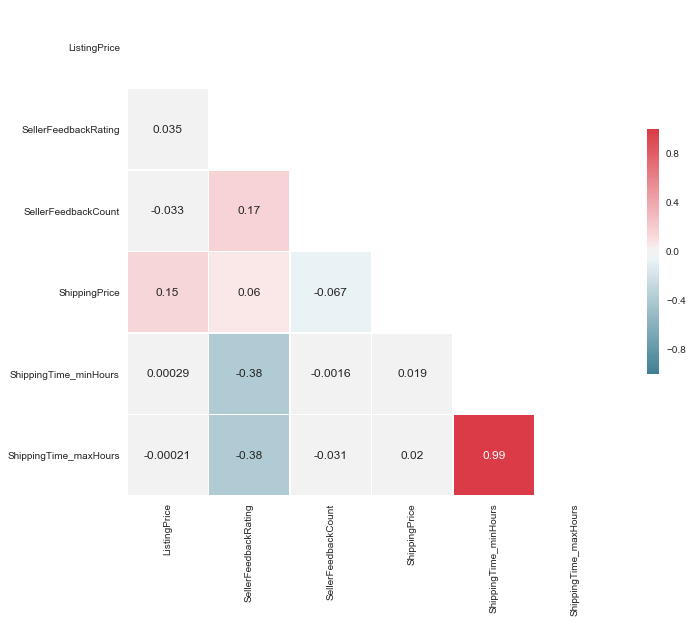

In [26]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
#clean_df = pd.read_csv('ge16-candidates-twitter-elected-clean.csv') still need to get clean data 
sns.set(style="white")

# Select columns containing continuous data the same as before 
# continuous_columns = clean_df[['day_follower_change','followers','following','overall_follower_change','tweets']].columns

# Calculate correlation of all pairs of continuous features
corr = clean_df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)

## 3.2 Continuous-continuous feature plots

In the following cells, there are plots for pairs of continuous features which have been shown to have a high correlation on the matrix above.

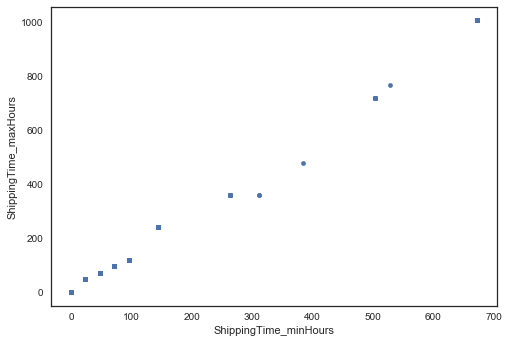

In [27]:
#df.plot(kind='scatter', x='ListingPrice', y='SellerFeedbackCount')
clean_df.plot(kind='scatter', x='ShippingTime_minHours', y='ShippingTime_maxHours')


## 3.3 Categorical-categorical feature plots

In this section, I create stacked bar charts for pairs of categorical features. I create an extra column 'percent' in the dataframe in order to calculate the percentage of rows having particular values for a pair of features, for example the percentage of women and men elected and not elected.

(0, 100)

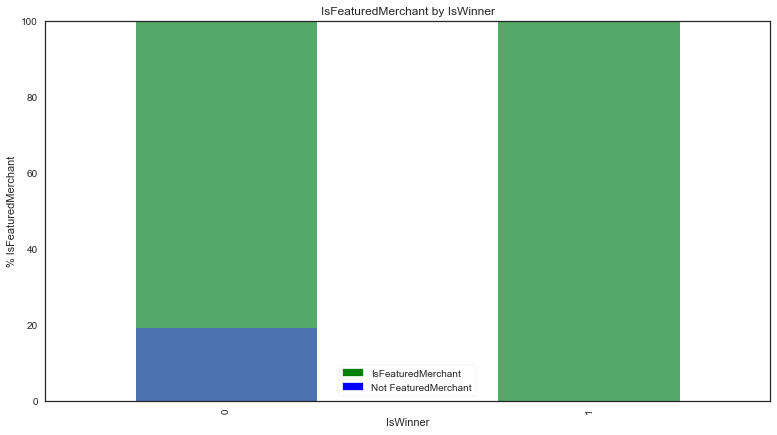

In [28]:
# Count the number of winner 
winner_count = 1 / clean_df[clean_df.IsWinner == 1].count()['IsWinner']


# Counts the number of male candidates
not_Winner_count = 1 / clean_df[clean_df.IsWinner == 0].count()['IsWinner']

# Create a new column in the dataframe called percent and insert male_count in all cells
clean_df['percent'] = winner_count * 100

# Find indexes of all rows containing value Female for Gender
index_list = clean_df[clean_df['IsWinner'] == 0].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    clean_df.loc[i, 'percent'] = not_Winner_count * 100

# Group dataframe by Gender and Elected and sum precent
category_group = clean_df[['percent','IsWinner','IsFeaturedMerchant']].groupby(['IsWinner','IsFeaturedMerchant']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="IsFeaturedMerchant by IsWinner", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='IsFeaturedMerchant')
blue_patch = mpatches.Patch(color='blue', label='Not FeaturedMerchant')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsWinner")
my_plot.set_ylabel("% IsFeaturedMerchant")
my_plot.set_ylim([0,100])


(0, 100)

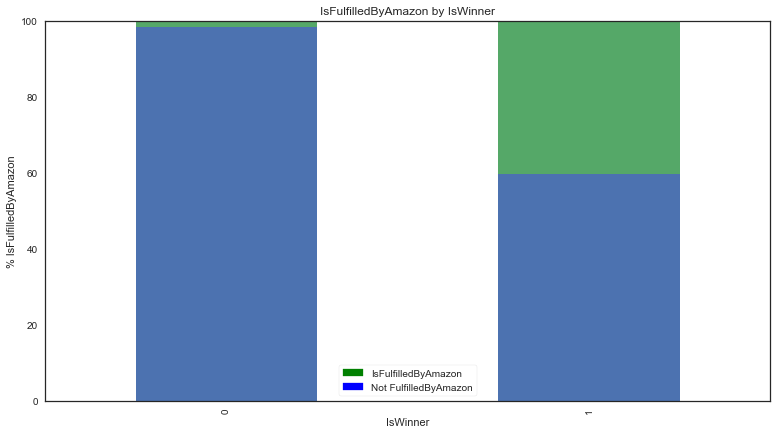

In [29]:
# Group dataframe by Gender and Elected and sum precent
category_group = clean_df[['percent','IsWinner','IsFulfilledByAmazon']].groupby(['IsWinner','IsFulfilledByAmazon']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="IsFulfilledByAmazon by IsWinner", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='IsFulfilledByAmazon')
blue_patch = mpatches.Patch(color='blue', label='Not FulfilledByAmazon')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsWinner")
my_plot.set_ylabel("% IsFulfilledByAmazon")
my_plot.set_ylim([0,100])

# 3.4 Continuous-categorical feature plots
In this section, I plot all continuous features with the categorical feature 'Elected' in box plots.

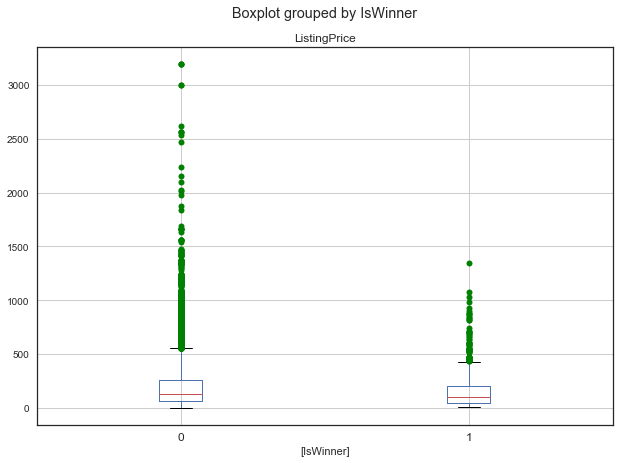

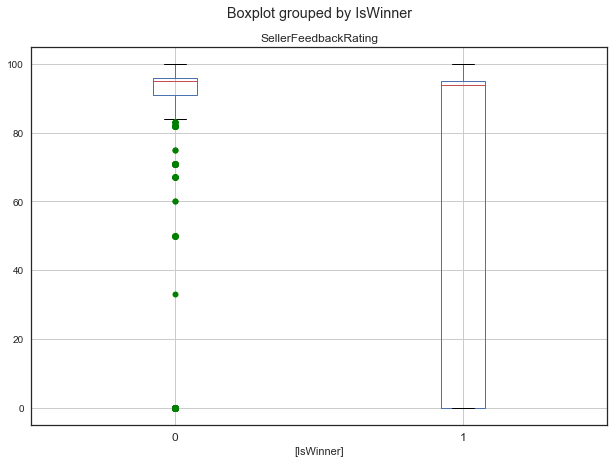

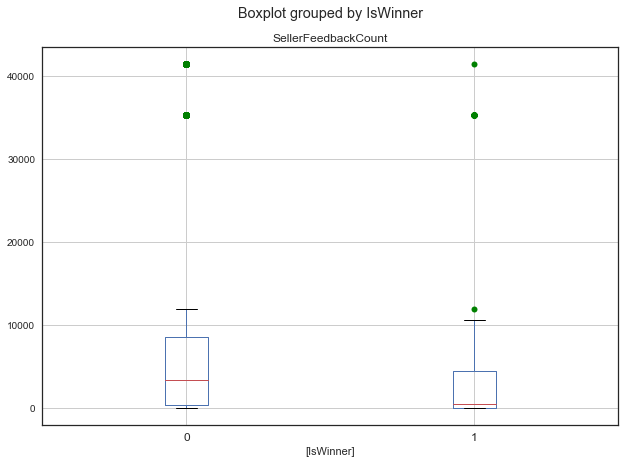

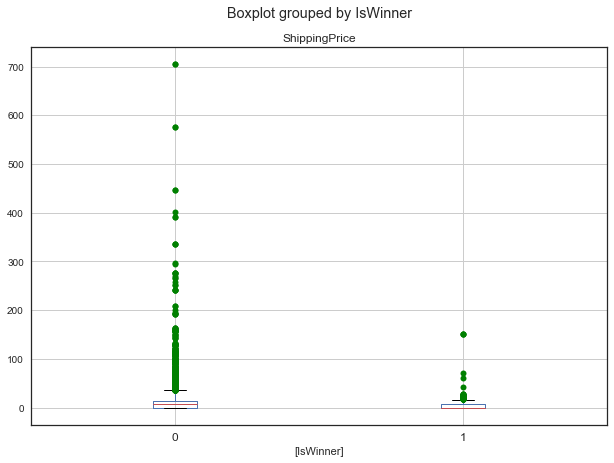

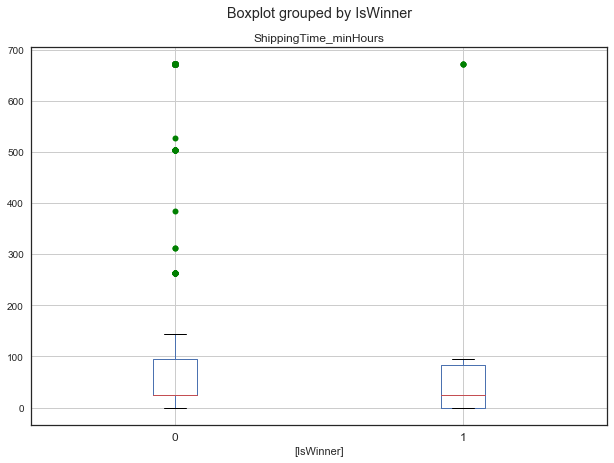

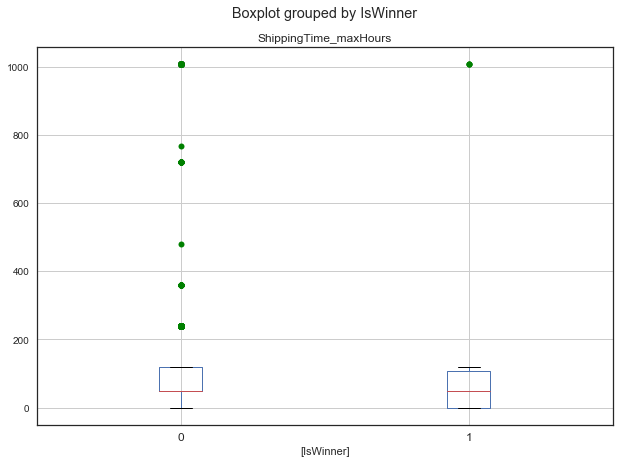

In [30]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
bp = clean_df.boxplot(column=['ListingPrice'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['SellerFeedbackRating'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['SellerFeedbackCount'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['ShippingPrice'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['ShippingTime_minHours'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['ShippingTime_maxHours'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))